In [1]:
from astropy.io import fits
from scipy import *
import numpy as np
from pylab import *

In [3]:
################ APOGESS DR14
## Number of objects: 277,371
hdulist = fits.open('allStar-l31c.2.fits')

In [21]:
################ GAIA DR2 matched to APOGEE DR14
## Number of objects: 284,395
## description: https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html
## data_gaia = loadtxt('gaia_dr2_apogee_cross.dat')
## save('gaia_dr2_apogee_cross.npy', data_gaia)

data_gaia = load('gaia_dr2_apogee_cross.npy').T
cols_gaia = ['ra', 'ra_err', 'dec', 'dec_err', 'para', 'para_err', 'pmra', 'pmra_err', 
             'pmdec', 'pmdec_err', 'ra_dec_corr', 'ra_para_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 
             'dec_para_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'para_pmra_corr', 'para_pmdec_corr', 
             'pmra_pmdec_corr', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 
             'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'radial_velocity', 
             'radial_velocity_error', 'j', 'j_err', 'h', 'h_err', 'k', 'k_err', 'teff', 'teff_err', 'vmacro']
gaia = lambda field: data_gaia[cols_gaia.index(field)]

In [29]:
print data_gaia.shape, len(cols_gaia), sum(isnan(gaia('para')))

(36, 284394) 36 9573


In [66]:
ra_gaia, dec_gaia = gaia('ra'), gaia('dec')
d_gaia = 1.0/gaia('para') ## distance in kpc

def ap2abs (mags):
    out = mags - 5.0*log10(d_gaia*1e2)
    out[isnan(out)]=-9999.0
    return out

Babs, Rabs, Gabs, Jabs, Habs, Kabs = [ap2abs (gaia(iband)) for iband in 
            ['phot_bp_mean_mag', 'phot_rp_mean_mag', 'phot_g_mean_mag', 'j','h','k']]

/Users/jia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


In [7]:
ra_apo, dec_apo = hdulist[1].data['RA'], hdulist[1].data['DEC']

In [8]:
from scipy.spatial import KDTree
tree_apo = KDTree(zip(ra_apo, dec_apo))
tree_gaia = KDTree(zip(ra_gaia, dec_gaia))

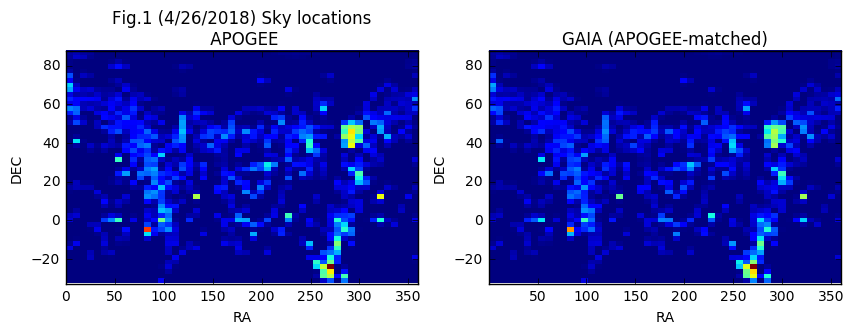

In [34]:
f, (ax1,ax2)=subplots(1,2,figsize=(10,3))
ax1.hist2d(ra_apo, dec_apo, bins=50)
ax2.hist2d(ra_gaia, dec_gaia, bins=50)
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
ax2.set_xlabel('RA')
ax2.set_ylabel('DEC')
ax1.set_title('Fig.1 (4/26/2018) Sky locations\n APOGEE')
ax2.set_title('GAIA (APOGEE-matched)')
show()

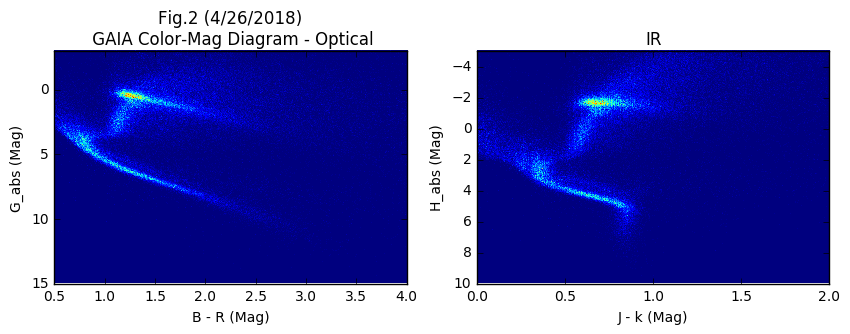

In [72]:
f, (ax1,ax2)=subplots(1,2,figsize=(10,3))
ax1.hist2d(Babs-Rabs, Gabs, bins=500, range = ((0.5,4),(-3, 15)))
ax1.set_xlabel('B - R (Mag)')
ax1.set_ylabel('G_abs (Mag)')
ax1.invert_yaxis()
ax1.set_title('Fig.2 (4/26/2018)\n GAIA Color-Mag Diagram - Optical')

ax2.hist2d(Jabs-Kabs, Habs,  bins=500, range = ((0, 2),(-5, 10)))
ax2.set_xlabel('J - k (Mag)')
ax2.set_ylabel('H_abs (Mag)')
ax2.invert_yaxis()
ax2.set_title('IR')
show()

In [ ]:
############### APOGEE cuts
idx_all=where( (hdulist[1].data['LOCATION_ID']>1))[0]
idx_noTelluric=where( (hdulist[1].data['LOCATION_ID']>1) & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
# Number of Telluric standards = 17293
idx_Teff5000 = where( (hdulist[1].data['LOCATION_ID']>1) 
                     & (Teff<5000))[0]
rvCC = hdulist[1].data['RV_CCFWHM']
rvAUTO = hdulist[1].data['RV_AUTOFWHM']
Teff = hdulist[1].data['TEFF']
idx_Teff5000_noT = where( (hdulist[1].data['LOCATION_ID']>1) 
                     & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9)
                     & (Teff<5000))[0]

idx_SNR10 = where(hdulist[1].data['SNR']>10)[0]
idx_SNR20 = where(hdulist[1].data['SNR']>20)[0]
idx_SNR50 = where(hdulist[1].data['SNR']>50)[0]
idx_SNR100 = where(hdulist[1].data['SNR']>100)[0]


MagJ = hdulist[1].data['J'][idx_high_noTelluric]
MagH = hdulist[1].data['H'][idx_high_noTelluric]
MagK = hdulist[1].data['K'][idx_high_noTelluric]